In [31]:
!pip3 install pydot
!pip3 install wandb
# Get helper_functions.py script from course GitHub
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [32]:
import wandb
# wandb.login()
# wandb.tensorboard.patch(root_logdir="logs")
# wandb.init(project="Food_not_Food", sync_teensorboard=True)

In [33]:
import tensorflow as tf
import os
tf.get_logger().setLevel('INFO')

In [34]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [35]:
!ls data/model_test_images/

advocate ball     test     train


## Create train/test

In [36]:
!mkdir data/model_test_images/train
!mkdir data/model_test_images/test

mkdir: data/model_test_images/train: File exists
mkdir: data/model_test_images/test: File exists


In [37]:
# Make splits of images


In [38]:
target_dirs = os.listdir("data/model_test_images")
target_dirs

['test', 'ball', 'train', 'advocate']

In [39]:
# train_split = (int(0.8 * len(ball_images)))
# train_split

In [40]:
# import numpy as np

# # Get random indexs of certain number from list of images
# train_idx = np.arange(len(ball_images))
# train_idx

In [41]:
import random
def create_train_test_list(target_dir):
    random.seed(42)
    image_list = [os.path.join(target_dir,img_path) for img_path in os.listdir(target_dir)]
    train_split = int(0.8 * len(image_list))
    train_image_list = random.sample(image_list,train_split)
    test_image_list = list(set(image_list).difference(set(train_image_list)))
    return train_image_list, test_image_list


train_image_list, test_image_list = create_train_test_list("data/model_test_images/ball")


In [42]:
len(train_image_list), len(test_image_list)

(40, 10)

In [43]:
# Create a function to move images
from shutil import copy2
def copy_images_to_file(img_path_list, target_dir,train=True):
        if train:
            # Make target directory
            # split_dir = "train"
            # print(img_path_list[0])
            # dir_to_make = os.path.join(target_dir,split_dir)
            # target_dir = os.path.join(target_dir , "train",)
            # os.makedirs(os.path.join(target_dir,split_dir) , exist_ok = True)
            split_dir = "train"
        else:
            split_dir = "test"
            # os.makedirs(os.path.join(target_dir, split_dir) , exist_ok = True)

        # Copy images
        for image_path in img_path_list:
            image_file_name = os.path.split(image_path)[-1]
            dest_path = os.path.join(target_dir, split_dir, image_dir, image_file_name)
            print(f"Copying: \n{image_path} to \n{dest_path}")
            copy2(image_path, dest_path)


In [44]:
data_dir = "data/model_test_images"
target_dir = "data/model_test_images_split"
for image_dir in os.listdir(data_dir):
    # print(image_dir)

    for split_dir in [ "train", "test"]:
        os.makedirs(os.path.join(target_dir, split_dir, image_dir) , exist_ok= True)

    # Make training and test lists of target images
    train_image_list , test_image_list = create_train_test_list(os.path.join(data_dir, image_dir))

    # Copy training images
    copy_images_to_file(img_path_list = train_image_list, 
                        target_dir = target_dir,
                        train=True)

    # Copt test images 
    copy_images_to_file(img_path_list = test_image_list, 
                        target_dir = target_dir,
                        train=False)

Copying: 
data/model_test_images/ball/1181488980_d6ed3b626d.jpg to 
data/model_test_images_split/train/ball/1181488980_d6ed3b626d.jpg
Copying: 
data/model_test_images/ball/65805171_3613f2bc4c.jpg to 
data/model_test_images_split/train/ball/65805171_3613f2bc4c.jpg
Copying: 
data/model_test_images/ball/2591563110_a38db04623.jpg to 
data/model_test_images_split/train/ball/2591563110_a38db04623.jpg
Copying: 
data/model_test_images/ball/2783605389_2243f28bb3.jpg to 
data/model_test_images_split/train/ball/2783605389_2243f28bb3.jpg
Copying: 
data/model_test_images/ball/2568700291_6b16f45f10.jpg to 
data/model_test_images_split/train/ball/2568700291_6b16f45f10.jpg
Copying: 
data/model_test_images/ball/3655368403_969b7e987e.jpg to 
data/model_test_images_split/train/ball/3655368403_969b7e987e.jpg
Copying: 
data/model_test_images/ball/3531521851_4771fe48a9.jpg to 
data/model_test_images_split/train/ball/3531521851_4771fe48a9.jpg
Copying: 
data/model_test_images/ball/3316080914_50ac9ce6bc.jpg to

In [45]:
# Next
# Make model tataset from train/test folders
# Build a model on train/test datasets
# Evaluate model
# Convert model to tfilte for deployment

## Load data

In [46]:
import tensorflow as tf

In [47]:
train_dir = "data/model_test_images_split/train"
test_dir = "data/model_test_images_split/test"
train_dir, test_dir

('data/model_test_images_split/train', 'data/model_test_images_split/test')

In [48]:
# Load in data
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
    batch_size=32,
    image_size=(224,224)
) 
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
    batch_size=32,
    image_size=(224,224)
) 
train_data, test_data

Found 80 files belonging to 4 classes.
Found 20 files belonging to 4 classes.


(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [49]:
train_data.class_names

['advocate', 'ball', 'test', 'train']

In [50]:
# Small model with two classes

## Build the first model

In [51]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)
test_data = test_data.prefetch(tf.data.AUTOTUNE)

In [52]:
# Replace top with our image
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# base_model
# Make model untrainable
base_model.trainable = False

# Build a functional model
input_layer = tf.keras.layers.Input (shape = (224,224,3))
x = base_model(input_layer)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_layer = tf.keras.layers.Dense(1,activation="sigmoid")(x)

# Construct model
model_1 = tf.keras.Model(input_layer, output_layer, name ="EfficientNetB0-V1")
model_1

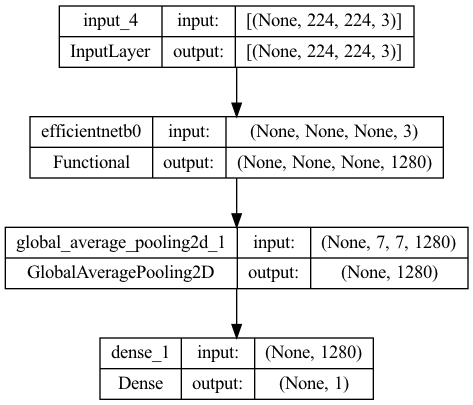

In [53]:
tf.keras.utils.plot_model(model_1,show_shapes=True)

In [54]:
# Complie model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [55]:
# Create EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,
    monitor = "loss"
)


In [56]:
# Fit model
wandb.init(sync_tensorboard=True)
history_1 = model_1.fit(train_data,
                        epochs=50,
                        validation_data=test_data,
                        callbacks=[early_stopping,
                                    create_tensorboard_callback("logs",model_1.name)])

global_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
train/epoch_accuracy,▁▄▆▇▇███████████████████████████████████
train/epoch_loss,█▇▆▅▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
validation/epoch_accuracy,▁▅▆▆▆▆▆▆▆▇▇▇████████████████████████████
validation/epoch_loss,█▇▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation/evaluation_accuracy_vs_iterations,▁▅▆▆▆▆▆▆▆▇▇▇████████████████████████████
validation/evaluation_loss_vs_iterations,█▇▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
global_step,150
train/epoch_accuracy,1.0


wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


Saving TensorBoard log files to: logs/EfficientNetB0-V1/20221016-154750
Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 0.6761 - accuracy: 0.5875

wandb: WARNING When using several event log directories, please call `wandb.tensorboard.patch(root_logdir="...")` before `wandb.init`


3/3 [==============================] - 12s 2s/step - loss: 0.6761 - accuracy: 0.5875 - val_loss: 0.6388 - val_accuracy: 0.6500
Epoch 2/50
3/3 [==============================] - 5s 2s/step - loss: 0.5419 - accuracy: 0.7750 - val_loss: 0.5433 - val_accuracy: 0.8000
Epoch 3/50
3/3 [==============================] - 4s 1s/step - loss: 0.4381 - accuracy: 0.9125 - val_loss: 0.4710 - val_accuracy: 0.8500
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 0.3716 - accuracy: 0.9250 - val_loss: 0.4171 - val_accuracy: 0.8500
Epoch 5/50
3/3 [==============================] - 4s 1s/step - loss: 0.3111 - accuracy: 0.9375 - val_loss: 0.3765 - val_accuracy: 0.8500
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 0.2709 - accuracy: 0.9750 - val_loss: 0.3452 - val_accuracy: 0.8500
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 0.2282 - accuracy: 0.9750 - val_loss: 0.3170 - val_accuracy: 0.8500
Epoch 8/50
3/3 [==============================] - 3

In [57]:
model_1.evaluate(test_data)

1/1 [==============================] - 1s 638ms/step - loss: 0.1149 - accuracy: 0.9500


[0.11491131782531738, 0.949999988079071]